In [ ]:
!git clone https://github.com/iqiukp/SVDD.git

Cloning into 'SVDD'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 67 (delta 16), reused 57 (delta 11), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [ ]:
ls

sample_data/  SVDD/


In [ ]:
cd SVDD

/content/SVDD


In [ ]:
pip install dirichlet

In [ ]:
import numpy as np
import dirichlet
from scipy.stats import dirichlet as Dir_spicy
a = [[10,1, 30], [4,9,1]]

# 1000 normal training data, 2 CoDa features 
X_train0 = np.random.dirichlet(a[0], 1000)
X_train1 = np.random.dirichlet(a[1], 1000)
y_train = np.ones(X_train0.shape[0]).reshape(X_train0.shape[0], 1)

# 100 normal test data, 2 CoDa features  
X_test0N = np.random.dirichlet(a[0], 100) 
X_test1N = np.random.dirichlet(a[1], 100) 
y_test_normal = np.ones(X_test0N.shape[0]).reshape(X_test0N.shape[0], 1)


# 1000 normal test data, 2 CoDa features
b = [[50,100, 20], [44,90,1]]
X_test0A = np.random.dirichlet(b[0], 10) 
X_test1A = np.random.dirichlet(b[1], 10)
y_test_anomal = -1 * np.ones(X_test0A.shape[0]).reshape(X_test0A.shape[0], 1)

#X_test = np.concatenate((X_test0, X_test1), axis=0)
y_test = np.concatenate((y_test_normal, y_test_anomal), axis=0)
y_test.shape

(110, 1)

Transform data using Dirichlet fearture

In [ ]:
def D_density(A, alpha): # transform compositional data to its estimated Diriclet density
    N = np.zeros(A.shape[0]).reshape(A.shape[0], 1)
    for i in range(A.shape[0]):
        N[i] = Dir_spicy.pdf(A[i], alpha)
    return N

In [ ]:
# transform X_train
X_train0_new = D_density(X_train0, a[0])
X_train1_new = D_density(X_train1, a[1])
X_train_New = np.concatenate((X_train0_new, X_train1_new), axis = 1)

In [ ]:
# transform X_test 
X_test0N_new = D_density(X_test0N, a[0])
X_test1N_new = D_density(X_test1N, a[1])
X_test0A_new = D_density(X_test0A, b[0])
X_test1A_new = D_density(X_test1A, b[1])
X_test0_new = np.concatenate((X_test0N_new, X_test0A_new), axis = 0)
X_test1_new = np.concatenate((X_test1N_new, X_test1A_new), axis = 0)

X_test_New = np.concatenate((X_test0_new, X_test1_new), axis = 1)
X_test_New.shape

(110, 2)



*** SVDD model training finished ***

iter             = 17
time cost        = 2.4973 s
obj              = -13639.9007
pData            = 100.0000 %
nData            = 0.0000 %
nSVs             = 2
radio of nSVs    = 0.2000 %
accuracy         = 99.9000 %




*** SVDD model test finished ***

time cost        = 0.0026 s
accuracy         = 100.0000 %




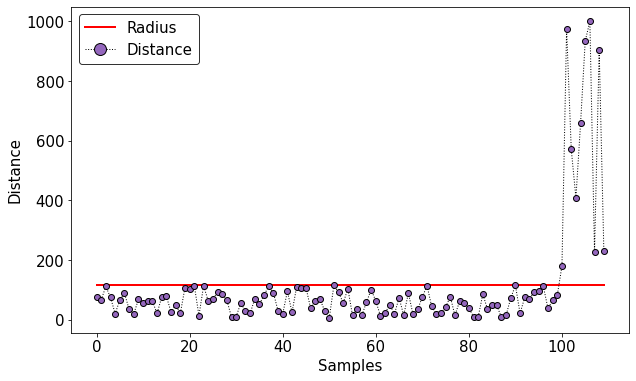

In [ ]:
# -*- coding: utf-8 -*-

import sys
sys.path.append("..")
from src.svdd import SVDD
from src.visualize import Visualization as draw


trainData=X_train_New
testData=X_test_New
trainLabel=y_train
testLabel = y_test


# kernel list
kernelList = {"1": {"type": 'linear', "offset": 0},
              #"2": {"type": 'gauss', "width": 1/24},
              #"3": {"type": 'ploy', "degree": 3, "offset": 0},
              #"4": {"type": 'tanh', "gamma": 1e-4, "offset": 0},
              #"5": {"type": 'lapl', "width": 1/12}
              }


for i in range(len(kernelList)):

    # set SVDD parameters
    parameters = {"positive penalty": 0.9,
                  "negative penalty": 0.8,
                  "kernel": kernelList.get(str(i+1)),
                  "option": {"display": 'on'}}
    
    # construct an SVDD model
    svdd = SVDD(parameters)
    
    # train SVDD model
    svdd.train(trainData, trainLabel)
      
    # test SVDD model
    distance, accuracy = svdd.test(testData, testLabel)
    
    # visualize the results
    # draw.testResult(svdd, distance)
    # draw.testROC(testLabel, distance)
    #draw.boundary(svdd, trainData, trainLabel)
    draw.testResult(svdd, distance)
